In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os 
import math 
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
old = pd.read_csv("regression_data.csv")
old.head()

,7129300520,10/13/14,3,1,1180,5650,1.1,0,0.1,3.1,7,1180.1,0.2,1955,0.3,98178,47.5112,-122.257,1340,5650.1,221900
0,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
1,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
2,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
3,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
4,7237550310,5/12/14,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1230000


In [3]:
# 

In [4]:
reg = pd.read_csv("regression_data.csv", names = ["id", "date", "bedrooms", "bathrooms", "sqft_living", 
                                                 "sqft_lot", "floors", "waterfront", "view","condition",
                                                 "grade", "sqft_above", "sqft_basement", "yr_built", 
                                                 "yr_renovated", "zipcode","lat","long","sqft_living15",
                                                 "sqft_lot15", "price"], header = None)
reg.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [5]:
reg.shape

(21597, 21)

In [6]:
reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [7]:
reg.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [8]:
reg = reg.drop(["id","lat","long"], axis=1)
reg.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900
1,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000
2,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000
3,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000
4,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000


In [9]:
reg["date"] = pd.to_datetime(reg["date"], format='%m/%d/%y')

In [10]:
reg.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000


In [11]:
reg['year'] = reg['date'].dt.year
reg['month'] = reg['date'].dt.month
reg['day'] = reg['date'].dt.day
reg.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000,2014,12,9
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000,2015,2,25
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000,2014,12,9
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000,2015,2,18


In [12]:
reg = reg.drop(["date"], axis=1)
reg.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000,2014,12,9
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000,2015,2,25
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000,2014,12,9
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000,2015,2,18


In [13]:
reg.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day
count,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000
mean,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,1986.620318,12758.283512,5.402966e+05,2014.322962,6.573969,15.687457
std,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,685.230472,27274.441950,3.673681e+05,0.467619,3.115061,8.634890
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000,7.800000e+04,2014.000000,1.000000,1.000000
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000,3.220000e+05,2014.000000,4.000000,8.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000,4.500000e+05,2014.000000,6.000000,16.000000
75%,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000,6.450000e+05,2015.000000,9.000000,23.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000,7.700000e+06,2015.000000,12.000000,31.000000


In [14]:
reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21597 non-null  int64  
 1   bathrooms      21597 non-null  float64
 2   sqft_living    21597 non-null  int64  
 3   sqft_lot       21597 non-null  int64  
 4   floors         21597 non-null  float64
 5   waterfront     21597 non-null  int64  
 6   view           21597 non-null  int64  
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  int64  
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   21597 non-null  int64  
 13  zipcode        21597 non-null  int64  
 14  sqft_living15  21597 non-null  int64  
 15  sqft_lot15     21597 non-null  int64  
 16  price          21597 non-null  int64  
 17  year           21597 non-null  int64  
 18  month 

In [15]:
def outlier_removal(reg):      
    for column in reg.select_dtypes(include=[np.number]):
        Q1 = reg[column].quantile(0.25)
        Q3 = reg[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        reg = reg[(reg[column] >= lower_bound) & (reg[column] <= upper_bound)]
    return reg

In [16]:
reg = outlier_removal(reg)

In [17]:
# fazer bucketing 1, 2-3 , 4-5,  >= 6
reg["bedrooms"].value_counts()


3    7274
4    3875
2    2145
5     643
Name: bedrooms, dtype: int64

In [18]:
def group_bedroom(val):
    if val in [1]:
        return 0
    elif val in [2, 3]:
        return 1
    elif val in [4,5]:
        return 2
    else:
        return 3

In [19]:
reg['bedroom_group'] = reg['bedrooms'].apply(group_bedroom)
reg.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,bedroom_group
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13,1
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000,2015,2,25,1
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000,2014,12,9,2
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000,2015,2,18,1
6,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,2238,6819,257500,2014,6,27,1


In [20]:
reg["bedroom_group"].value_counts()

1    9419
2    4518
Name: bedroom_group, dtype: int64

In [21]:
reg["bathrooms"] = reg["bathrooms"].astype(int)
reg["floors"] = reg["floors"].astype(int)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,bedroom_group
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13,1


In [22]:
# bucketing 0-1 , 2-3, >3

reg["bathrooms"].value_counts()

2    6882
1    6385
3     654
0      16
Name: bathrooms, dtype: int64

In [23]:
def group_bathroom(val):
    if val in [0, 1]:
        return 0
    elif val in [2, 3]:
        return 1
    else:
        return 2


In [24]:
reg['bathroom_group'] = reg['bathrooms'].apply(group_bathroom)
reg.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,bedroom_group,bathroom_group
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13,1,0
2,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,2720,8062,180000,2015,2,25,1,0
3,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000,2014,12,9,2,1
4,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000,2015,2,18,1,1
6,3,2,1715,6819,2,0,0,3,7,1715,0,1995,0,98003,2238,6819,257500,2014,6,27,1,1


In [25]:
# sqft of the house , transform in square meter
reg["sqft_living"].value_counts()

1400    117
1300    114
1010    111
1320    110
1660    109
       ... 
3045      1
2717      1
2905      1
2375      1
1425      1
Name: sqft_living, Length: 586, dtype: int64

In [26]:
reg['sqm2_living'] = round(reg['sqft_living'] / 10.764, 1)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,bedroom_group,bathroom_group,sqm2_living
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13,1,0,109.6


In [27]:
# sqft of the lot
reg["sqft_lot"].value_counts()

5000     241
6000     194
4000     175
7200     166
8400      92
        ... 
10834      1
8568       1
9235       1
8049       1
1076       1
Name: sqft_lot, Length: 6129, dtype: int64

In [28]:
reg['sqm2_lot'] = round(reg['sqft_lot'] / 10.764, 1)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,bedroom_group,bathroom_group,sqm2_living,sqm2_lot
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13,1,0,109.6,524.9


In [29]:
reg["floors"].value_counts()

1    8688
2    4748
3     501
Name: floors, dtype: int64

In [30]:
reg["waterfront"].value_counts()

0    13937
Name: waterfront, dtype: int64

In [31]:
# views 
reg["view"].value_counts()

0    13937
Name: view, dtype: int64

In [32]:
# bucket in viewed or not viewed

def viewed_or_not(val):
    if val == 0:
        return 0
    else:
        return 1

In [33]:
reg['viewed_or_not'] = reg['view'].apply(viewed_or_not)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13,1,0,109.6,524.9,0


In [34]:
reg["viewed_or_not"].value_counts()

0    13937
Name: viewed_or_not, dtype: int64

In [35]:
reg["condition"].value_counts()

3    9025
4    3701
5    1110
2     101
Name: condition, dtype: int64

In [36]:
reg["grade"].value_counts()

7    7241
8    4104
6    1622
9     970
Name: grade, dtype: int64

In [37]:
reg["sqft_above"].value_counts()
#sqft apart from basement

1010    181
1200    173
1300    165
1140    153
1060    152
       ... 
2414      1
901       1
2068      1
2807      1
1425      1
Name: sqft_above, Length: 543, dtype: int64

In [38]:
reg['sqm2_above'] = round(reg['sqft_above'] / 10.764, 1)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13,1,0,109.6,524.9,0,109.6


In [39]:
reg["sqft_basement"].value_counts()
# sqftge basement

0       8926
700      158
500      157
600      148
400      140
        ... 
894        1
792        1
518        1
1135       1
248        1
Name: sqft_basement, Length: 150, dtype: int64

In [40]:
reg['sqm2_basement'] = round(reg['sqft_basement'] / 10.764, 1)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13,1,0,109.6,524.9,0,109.6,0.0


In [41]:
reg["yr_built"].value_counts()
# 0-30 , 30-60, 60-90 , > 90 , categorica ordinal!!

2014    341
2005    320
2003    310
2006    288
2007    285
       ... 
1936     19
1932     15
1933      9
1934      8
1935      7
Name: yr_built, Length: 116, dtype: int64

In [42]:
reg["age"] = 2023 - reg["yr_built"]
reg["age"].value_counts()

9     341
18    320
20    310
17    288
16    285
     ... 
87     19
91     15
90      9
89      8
88      7
Name: age, Length: 116, dtype: int64

In [43]:
def group_year(val):
    if val in [0, 30]:
        return 0
    elif val in [31, 60]:
        return 1
    elif val in [61, 90]:
        return 2
    else:
        return 3

In [44]:
reg['age_group'] = reg['age'].apply(group_year)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,age_group
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13,1,0,109.6,524.9,0,109.6,0.0,68,3


In [45]:
reg["yr_renovated"].value_counts()
# renovaçao sim/não

0    13937
Name: yr_renovated, dtype: int64

In [46]:
# group - renovated or not

def ren_or_not(val):
    if val == 0:
        return 0
    else:
        return 1

In [47]:
reg['ren_or_not'] = reg['yr_renovated'].apply(ren_or_not)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,age_group,ren_or_not
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13,1,0,109.6,524.9,0,109.6,0.0,68,3,0


In [48]:
reg["zipcode"].value_counts()
# ver os zipcodes - ricos  ---> ver mais a frente

98103    481
98133    447
98038    442
98115    442
98117    439
        ... 
98077     25
98014     19
98024     15
98070     10
98039      3
Name: zipcode, Length: 70, dtype: int64

In [49]:
reg["sqft_living15"].value_counts()
# Living room area in 2015(implies-- some renovations) 
# This might or might not have affected the lotsize area

1540    167
1440    158
1500    151
1560    150
1510    141
       ... 
1815      1
2236      1
2253      1
2403      1
2927      1
Name: sqft_living15, Length: 476, dtype: int64

In [50]:
reg['sqm2_living15'] = round(reg['sqft_living15'] / 10.764, 1)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,age_group,ren_or_not,sqm2_living15
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13,1,0,109.6,524.9,0,109.6,0.0,68,3,0,124.5


In [51]:
reg["sqft_lot15"].value_counts()
# lotSize area in 2015(implies-- some renovations)

5000    291
4000    244
6000    198
7200    153
7500    112
       ... 
7639      1
7761      1
7556      1
4659      1
2007      1
Name: sqft_lot15, Length: 5357, dtype: int64

In [52]:
reg['sqm2_lot15'] = round(reg['sqft_lot15'] / 10.764, 1)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,age_group,ren_or_not,sqm2_living15,sqm2_lot15
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13,1,0,109.6,524.9,0,109.6,0.0,68,3,0,124.5,524.9


In [53]:
reg["price"].value_counts()

350000    135
325000    124
450000    124
425000    122
300000    114
         ... 
285650      1
154200      1
787000      1
280400      1
402101      1
Name: price, Length: 2640, dtype: int64

In [54]:
def price_category(val):
    if val >= 0 and val <= 325000:
        return 0 
    elif val >= 325001 and val <= 649999:
        return 1    
    elif val >= 650000 and val <= 974999:
        return 2
    elif val >= 975000 and val <= 1299999:
        return 3
    else:
        return 4


In [55]:
reg['price_cat'] = reg['price'].apply(price_category)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,age_group,ren_or_not,sqm2_living15,sqm2_lot15,price_cat
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13,1,0,109.6,524.9,0,109.6,0.0,68,3,0,124.5,524.9,0


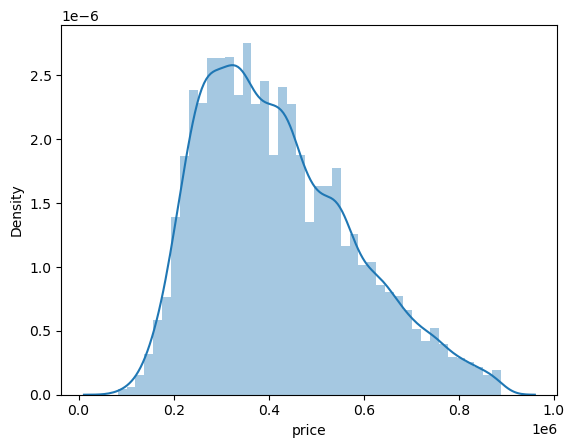

In [56]:
sns.distplot(reg["price"])
plt.show()

In [57]:
reg["price_cat"].value_counts()

1    7881
0    4643
2    1413
Name: price_cat, dtype: int64

In [58]:
# houses sold in 2014 e 2015 --> only two , drop them
reg["year"].value_counts()

2014    9401
2015    4536
Name: year, dtype: int64

In [59]:
reg = reg.drop(["year"], axis=1)
reg.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,month,day,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,age_group,ren_or_not,sqm2_living15,sqm2_lot15,price_cat
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,10,13,1,0,109.6,524.9,0,109.6,0.0,68,3,0,124.5,524.9,0
2,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,2720,8062,180000,2,25,1,0,71.5,929.0,0,71.5,0.0,90,2,0,252.7,749.0,0
3,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000,12,9,2,1,182.1,464.5,0,97.5,84.5,58,3,0,126.3,464.5,1
4,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000,2,18,1,1,156.1,750.7,0,156.1,0.0,36,3,0,167.2,697.0,1
6,3,2,1715,6819,2,0,0,3,7,1715,0,1995,0,98003,2238,6819,257500,6,27,1,1,159.3,633.5,0,159.3,0.0,28,3,0,207.9,633.5,0


In [60]:
reg["month"].value_counts()
# Q1-4

5     1508
7     1439
4     1426
6     1387
8     1261
3     1233
10    1217
9     1131
12     960
11     907
2      838
1      630
Name: month, dtype: int64

In [61]:
def quarter(val):
      if val >= 1 and val <= 3:
        return 1 
      if val >= 4  and val <=6:
        return 2    
      if val >= 7 and val <= 9:
        return 3
      else:
        return 4

In [62]:
reg["quarter"] = reg["month"].apply(quarter)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,month,day,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,age_group,ren_or_not,sqm2_living15,sqm2_lot15,price_cat,quarter
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,10,13,1,0,109.6,524.9,0,109.6,0.0,68,3,0,124.5,524.9,0,4


In [63]:
reg["day"].value_counts()
# dividir em quinzenas

23    593
5     519
22    507
24    500
20    499
16    497
18    496
9     493
10    484
17    482
25    481
27    479
2     479
8     472
6     469
12    467
13    464
3     445
11    439
26    437
4     435
21    428
19    423
7     420
29    418
14    416
15    400
30    400
28    387
1     344
31    164
Name: day, dtype: int64

In [64]:
def quinzena(day):
     if day >= 1 and day <= 14:
        return 1 
     else:
        return 2

In [65]:
reg["fortnight"] = reg["day"].apply(quinzena)

In [66]:
reg["fortnight"].value_counts()

2    7591
1    6346
Name: fortnight, dtype: int64

In [67]:
reg.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,month,day,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,age_group,ren_or_not,sqm2_living15,sqm2_lot15,price_cat,quarter,fortnight
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,10,13,1,0,109.6,524.9,0,109.6,0.0,68,3,0,124.5,524.9,0,4,1
2,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,2720,8062,180000,2,25,1,0,71.5,929.0,0,71.5,0.0,90,2,0,252.7,749.0,0,1,2
3,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000,12,9,2,1,182.1,464.5,0,97.5,84.5,58,3,0,126.3,464.5,1,4,1
4,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000,2,18,1,1,156.1,750.7,0,156.1,0.0,36,3,0,167.2,697.0,1,1,2
6,3,2,1715,6819,2,0,0,3,7,1715,0,1995,0,98003,2238,6819,257500,6,27,1,1,159.3,633.5,0,159.3,0.0,28,3,0,207.9,633.5,0,2,2


In [68]:
reg_model = reg.copy()

In [69]:
reg_model.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,month,day,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,age_group,ren_or_not,sqm2_living15,sqm2_lot15,price_cat,quarter,fortnight
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,10,13,1,0,109.6,524.9,0,109.6,0.0,68,3,0,124.5,524.9,0,4,1
2,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,2720,8062,180000,2,25,1,0,71.5,929.0,0,71.5,0.0,90,2,0,252.7,749.0,0,1,2
3,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000,12,9,2,1,182.1,464.5,0,97.5,84.5,58,3,0,126.3,464.5,1,4,1
4,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000,2,18,1,1,156.1,750.7,0,156.1,0.0,36,3,0,167.2,697.0,1,1,2
6,3,2,1715,6819,2,0,0,3,7,1715,0,1995,0,98003,2238,6819,257500,6,27,1,1,159.3,633.5,0,159.3,0.0,28,3,0,207.9,633.5,0,2,2


In [70]:
reg_model.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'price', 'month', 'day', 'bedroom_group',
       'bathroom_group', 'sqm2_living', 'sqm2_lot', 'viewed_or_not',
       'sqm2_above', 'sqm2_basement', 'age', 'age_group', 'ren_or_not',
       'sqm2_living15', 'sqm2_lot15', 'price_cat', 'quarter', 'fortnight'],
      dtype='object')

In [71]:
reg_model = reg_model.drop(["bedrooms", "bathrooms","view","sqft_living", "sqft_lot", "sqft_above",
                            "sqft_basement", "yr_built", "yr_renovated", "zipcode", "sqft_living15", 
                            "sqft_lot15", "month", "day", "age", "price_cat"], axis = 1)
reg_model.head()

,floors,waterfront,condition,grade,price,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age_group,ren_or_not,sqm2_living15,sqm2_lot15,quarter,fortnight
0,1,0,3,7,221900,1,0,109.6,524.9,0,109.6,0.0,3,0,124.5,524.9,4,1
2,1,0,3,6,180000,1,0,71.5,929.0,0,71.5,0.0,2,0,252.7,749.0,1,2
3,1,0,5,7,604000,2,1,182.1,464.5,0,97.5,84.5,3,0,126.3,464.5,4,1
4,1,0,3,8,510000,1,1,156.1,750.7,0,156.1,0.0,3,0,167.2,697.0,1,2
6,2,0,3,7,257500,1,1,159.3,633.5,0,159.3,0.0,3,0,207.9,633.5,2,2


In [72]:
reg_model["living_sqm15_init"] = reg["sqm2_living15"] - reg["sqm2_living"]
reg_model.head()

,floors,waterfront,condition,grade,price,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age_group,ren_or_not,sqm2_living15,sqm2_lot15,quarter,fortnight,living_sqm15_init
0,1,0,3,7,221900,1,0,109.6,524.9,0,109.6,0.0,3,0,124.5,524.9,4,1,14.9
2,1,0,3,6,180000,1,0,71.5,929.0,0,71.5,0.0,2,0,252.7,749.0,1,2,181.2
3,1,0,5,7,604000,2,1,182.1,464.5,0,97.5,84.5,3,0,126.3,464.5,4,1,-55.8
4,1,0,3,8,510000,1,1,156.1,750.7,0,156.1,0.0,3,0,167.2,697.0,1,2,11.1
6,2,0,3,7,257500,1,1,159.3,633.5,0,159.3,0.0,3,0,207.9,633.5,2,2,48.6


In [73]:
def bigger_living_or_not(val):
      if val <= 0:
        return 0  
      else:
        return 1

In [74]:
reg_model['bigger_living_or_not'] = reg_model["living_sqm15_init"].apply(bigger_living_or_not)
reg_model.head(1)

,floors,waterfront,condition,grade,price,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age_group,ren_or_not,sqm2_living15,sqm2_lot15,quarter,fortnight,living_sqm15_init,bigger_living_or_not
0,1,0,3,7,221900,1,0,109.6,524.9,0,109.6,0.0,3,0,124.5,524.9,4,1,14.9,1


In [75]:
reg_model["bigger_living_or_not"].value_counts()

0    7477
1    6460
Name: bigger_living_or_not, dtype: int64

In [76]:
reg_model["lot_sqm15_init"] = reg["sqm2_lot15"] - reg["sqm2_lot"]
reg_model.head()

,floors,waterfront,condition,grade,price,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age_group,ren_or_not,sqm2_living15,sqm2_lot15,quarter,fortnight,living_sqm15_init,bigger_living_or_not,lot_sqm15_init
0,1,0,3,7,221900,1,0,109.6,524.9,0,109.6,0.0,3,0,124.5,524.9,4,1,14.9,1,0.0
2,1,0,3,6,180000,1,0,71.5,929.0,0,71.5,0.0,2,0,252.7,749.0,1,2,181.2,1,-180.0
3,1,0,5,7,604000,2,1,182.1,464.5,0,97.5,84.5,3,0,126.3,464.5,4,1,-55.8,0,0.0
4,1,0,3,8,510000,1,1,156.1,750.7,0,156.1,0.0,3,0,167.2,697.0,1,2,11.1,1,-53.7
6,2,0,3,7,257500,1,1,159.3,633.5,0,159.3,0.0,3,0,207.9,633.5,2,2,48.6,1,0.0


In [77]:
def bigger_lot_or_not(val):
      if val <= 0:
        return 0  
      else:
        return 1

In [78]:
reg_model['bigger_lot_or_not'] = reg_model["lot_sqm15_init"].apply(bigger_lot_or_not)
reg_model.head()

,floors,waterfront,condition,grade,price,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age_group,ren_or_not,sqm2_living15,sqm2_lot15,quarter,fortnight,living_sqm15_init,bigger_living_or_not,lot_sqm15_init,bigger_lot_or_not
0,1,0,3,7,221900,1,0,109.6,524.9,0,109.6,0.0,3,0,124.5,524.9,4,1,14.9,1,0.0,0
2,1,0,3,6,180000,1,0,71.5,929.0,0,71.5,0.0,2,0,252.7,749.0,1,2,181.2,1,-180.0,0
3,1,0,5,7,604000,2,1,182.1,464.5,0,97.5,84.5,3,0,126.3,464.5,4,1,-55.8,0,0.0,0
4,1,0,3,8,510000,1,1,156.1,750.7,0,156.1,0.0,3,0,167.2,697.0,1,2,11.1,1,-53.7,0
6,2,0,3,7,257500,1,1,159.3,633.5,0,159.3,0.0,3,0,207.9,633.5,2,2,48.6,1,0.0,0


In [79]:
reg_model.columns

Index(['floors', 'waterfront', 'condition', 'grade', 'price', 'bedroom_group',
       'bathroom_group', 'sqm2_living', 'sqm2_lot', 'viewed_or_not',
       'sqm2_above', 'sqm2_basement', 'age_group', 'ren_or_not',
       'sqm2_living15', 'sqm2_lot15', 'quarter', 'fortnight',
       'living_sqm15_init', 'bigger_living_or_not', 'lot_sqm15_init',
       'bigger_lot_or_not'],
      dtype='object')

In [80]:
reg_model = reg_model.drop(["living_sqm15_init", "lot_sqm15_init"], axis = 1)
reg_model.head()

,floors,waterfront,condition,grade,price,bedroom_group,bathroom_group,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age_group,ren_or_not,sqm2_living15,sqm2_lot15,quarter,fortnight,bigger_living_or_not,bigger_lot_or_not
0,1,0,3,7,221900,1,0,109.6,524.9,0,109.6,0.0,3,0,124.5,524.9,4,1,1,0
2,1,0,3,6,180000,1,0,71.5,929.0,0,71.5,0.0,2,0,252.7,749.0,1,2,1,0
3,1,0,5,7,604000,2,1,182.1,464.5,0,97.5,84.5,3,0,126.3,464.5,4,1,0,0
4,1,0,3,8,510000,1,1,156.1,750.7,0,156.1,0.0,3,0,167.2,697.0,1,2,1,0
6,2,0,3,7,257500,1,1,159.3,633.5,0,159.3,0.0,3,0,207.9,633.5,2,2,1,0


In [81]:
target = reg_model["price"]

In [82]:
cat_model = reg_model[["floors", 'waterfront', 'condition', 'grade', "bedroom_group",
                       'bathroom_group', 'viewed_or_not','age_group', 'ren_or_not', 
                       'quarter', 'fortnight',"bigger_living_or_not", 'bigger_lot_or_not']]
cat_model.head()

,floors,waterfront,condition,grade,bedroom_group,bathroom_group,viewed_or_not,age_group,ren_or_not,quarter,fortnight,bigger_living_or_not,bigger_lot_or_not
0,1,0,3,7,1,0,0,3,0,4,1,1,0
2,1,0,3,6,1,0,0,2,0,1,2,1,0
3,1,0,5,7,2,1,0,3,0,4,1,0,0
4,1,0,3,8,1,1,0,3,0,1,2,1,0
6,2,0,3,7,1,1,0,3,0,2,2,1,0


In [83]:
num_model = reg_model[['sqm2_living', 'sqm2_lot', 'sqm2_above', 'sqm2_basement', 
                       'sqm2_living15', 'sqm2_lot15']]
num_model.head()  

,sqm2_living,sqm2_lot,sqm2_above,sqm2_basement,sqm2_living15,sqm2_lot15
0,109.6,524.9,109.6,0.0,124.5,524.9
2,71.5,929.0,71.5,0.0,252.7,749.0
3,182.1,464.5,97.5,84.5,126.3,464.5
4,156.1,750.7,156.1,0.0,167.2,697.0
6,159.3,633.5,159.3,0.0,207.9,633.5


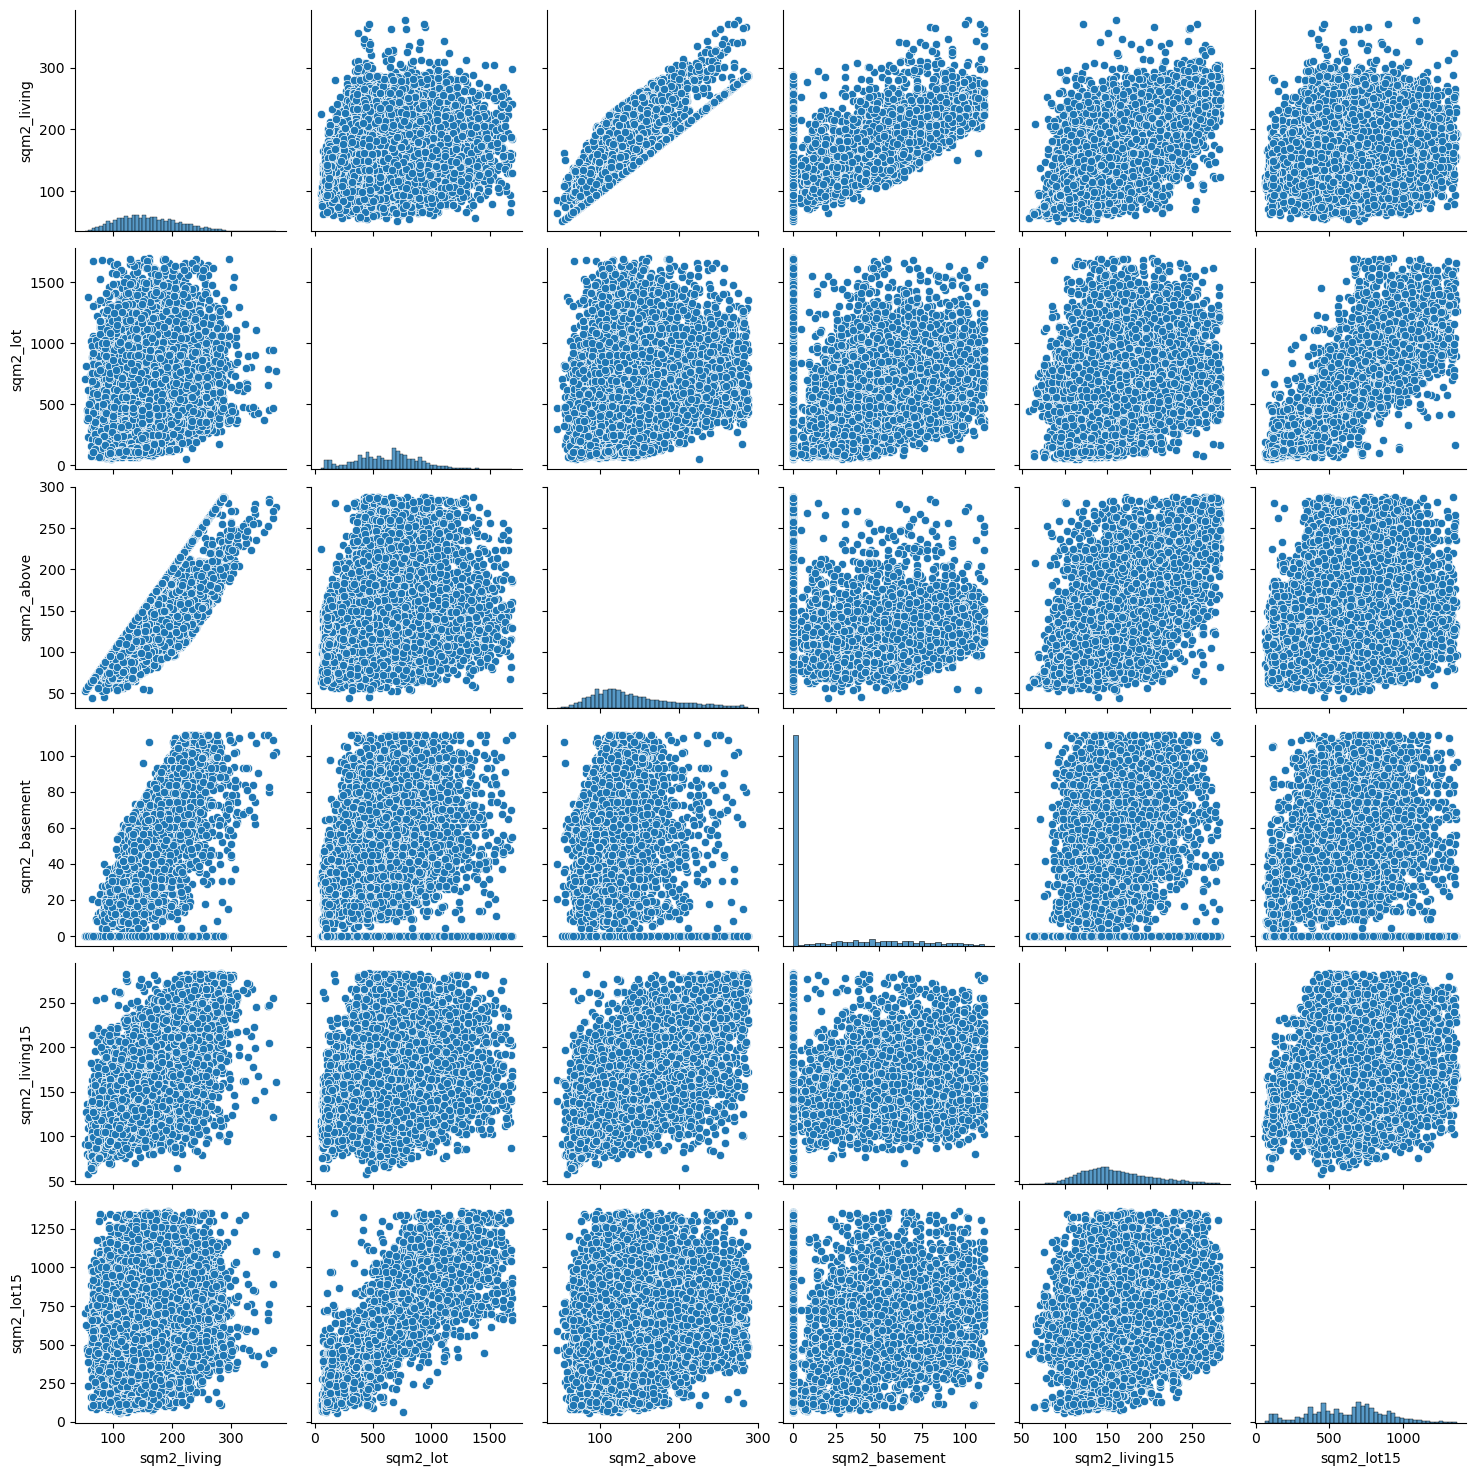

In [84]:
sns.pairplot(num_model)

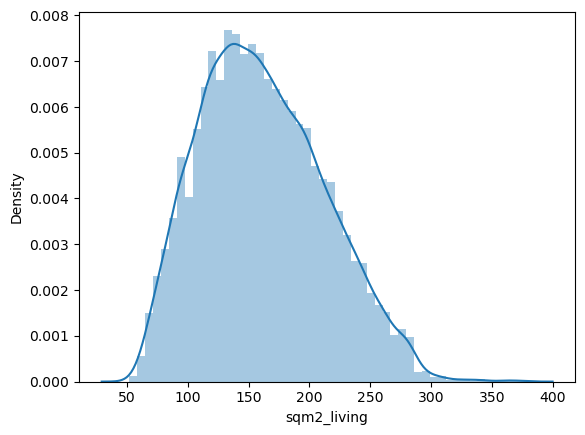

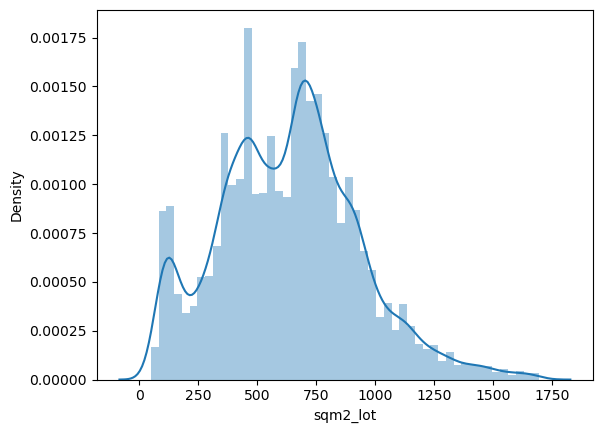

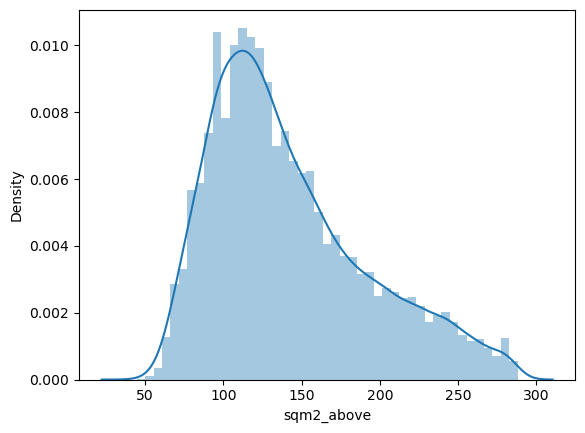

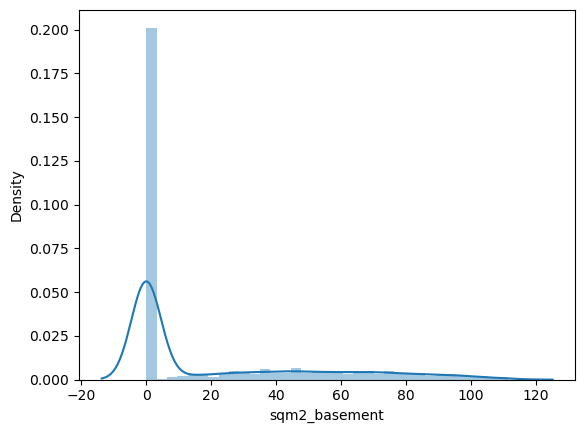

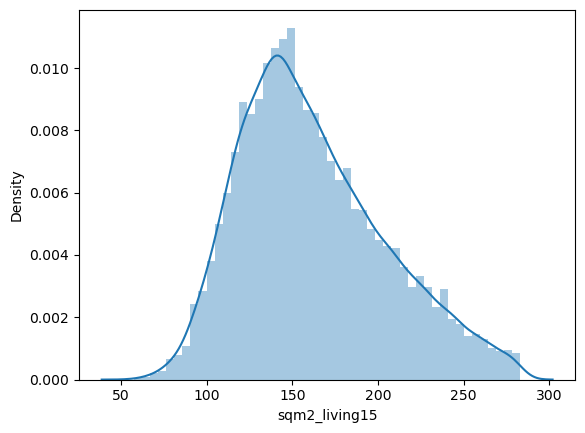

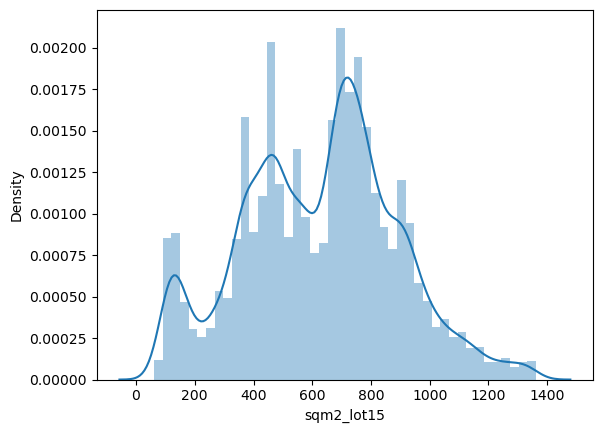

In [85]:
for column in num_model.columns:
    sns.distplot(num_model[column])
    plt.show()

In [86]:
num_model_corr = num_model.corr()
num_model_corr = round(num_model_corr,2)
num_model_corr

,sqm2_living,sqm2_lot,sqm2_above,sqm2_basement,sqm2_living15,sqm2_lot15
sqm2_living,1.00,0.16,0.82,0.33,0.70,0.15
sqm2_lot,0.16,1.00,0.11,0.08,0.19,0.88
sqm2_above,0.82,0.11,1.00,-0.28,0.68,0.10
sqm2_basement,0.33,0.08,-0.28,1.00,0.06,0.08
sqm2_living15,0.70,0.19,0.68,0.06,1.00,0.21
sqm2_lot15,0.15,0.88,0.10,0.08,0.21,1.00


<Figure size 1000x1000 with 0 Axes>

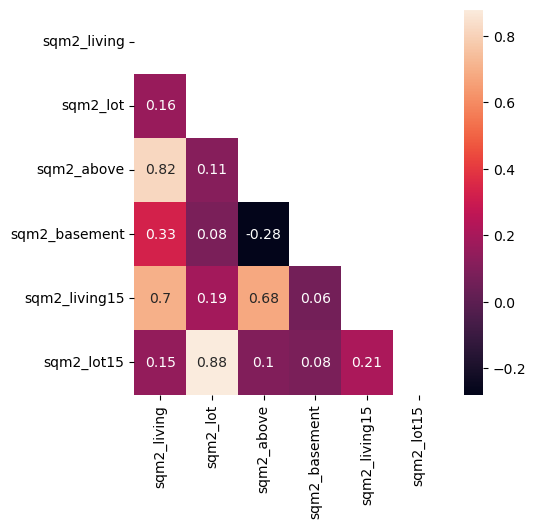

In [87]:
plt.figure(figsize=(10,10))

mask = np.zeros_like(num_model_corr)

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.heatmap(num_model_corr, mask=mask, annot=True)
plt.show()

In [88]:
X = num_model
y = target

In [89]:
transformer = MinMaxScaler().fit(X) 
x_minmax = transformer.transform(X) 
print(x_minmax.shape)

(13937, 6)


In [90]:
X_norm = pd.DataFrame(x_minmax,index = X.index, columns=X.columns)
X_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13937 entries, 0 to 21596
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sqm2_living    13937 non-null  float64
 1   sqm2_lot       13937 non-null  float64
 2   sqm2_above     13937 non-null  float64
 3   sqm2_basement  13937 non-null  float64
 4   sqm2_living15  13937 non-null  float64
 5   sqm2_lot15     13937 non-null  float64
dtypes: float64(6)
memory usage: 762.2 KB


In [91]:
X_norm.head()

,sqm2_living,sqm2_lot,sqm2_above,sqm2_basement,sqm2_living15,sqm2_lot15
0,0.177122,0.289339,0.267050,0.000000,0.296937,0.356846
2,0.059963,0.534665,0.110518,0.000000,0.865957,0.529046
3,0.400062,0.252671,0.217338,0.757848,0.304927,0.310435
4,0.320111,0.426421,0.458094,0.000000,0.486462,0.489089
6,0.329951,0.355270,0.471241,0.000000,0.667111,0.440295


In [92]:
model_conc = pd.concat([X_norm, cat_model], axis = 1)
model_conc.sample(50)

,sqm2_living,sqm2_lot,sqm2_above,sqm2_basement,sqm2_living15,sqm2_lot15,floors,waterfront,condition,grade,bedroom_group,bathroom_group,viewed_or_not,age_group,ren_or_not,quarter,fortnight,bigger_living_or_not,bigger_lot_or_not
20164,0.671279,0.267363,0.927280,0.000000,0.944075,0.329030,2,0,3,9,2,1,0,3,0,2,1,0,0
13272,0.377306,0.329407,0.213640,0.699552,0.474035,0.394345,1,0,4,7,1,0,0,3,0,2,1,0,0
8143,0.354244,0.358426,0.286360,0.475336,0.486462,0.578070,1,0,4,8,1,1,0,3,0,2,2,0,1
20670,0.317036,0.221163,0.453985,0.000000,0.432756,0.283464,1,0,3,7,1,1,0,3,0,3,2,0,1
20487,0.242927,0.045775,0.308956,0.099552,0.339991,0.045566,2,0,3,7,1,1,0,3,0,4,1,1,0
11670,0.297048,0.382103,0.427280,0.000000,0.325788,0.595974,2,0,2,7,1,1,0,0,0,1,2,0,1
20606,0.579951,0.370204,0.805259,0.000000,0.985353,0.297833,2,0,3,8,2,1,0,3,0,3,2,1,0
17295,0.128536,0.340214,0.202136,0.000000,0.160675,0.421239,1,0,3,7,1,0,0,3,0,4,1,0,0
6527,0.240160,0.387142,0.255546,0.208072,0.494896,0.524051,1,0,3,7,1,1,0,3,0,2,2,1,1
18172,0.314268,0.394184,0.450288,0.000000,0.725699,0.567312,1,0,3,7,1,1,0,3,0,1,1,1,1


In [93]:
len(model_conc)

13937

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [95]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [96]:
pred = model.predict(X_test)
pred.shape

(4182,)

In [97]:
R2 = r2_score(y_test, pred)
adj_r2 = (1 - (1 - R2) * ((X.shape[0] - 1) / (X.shape[0] - X.shape[1] - 1)))
RMSE = mean_squared_error(y_test, pred, squared=False)
MSE = mean_squared_error(y_test, pred)
print("r2 = ", R2)
print("adjusted r2 = ", adj_r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)

r2 =  0.289186518574195
adjusted r2 =  0.2888803533991372
RMSE =  134936.31369378063
MSE =  18207808753.266373


In [98]:
results = pd.DataFrame()
results['true'] = y_test
results['pred'] = pred
results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,diff
20134,459000,383380.802256,75619.197744
17950,240000,316263.877312,76263.877312
18283,549900,394074.454865,155825.545135
2653,475000,499563.142081,24563.142081
21073,359950,514982.050158,155032.050158
...,...,...,...
14176,639950,466691.100745,173258.899255
3252,418000,371398.728707,46601.271293
17184,305000,360193.630846,55193.630846
13327,510000,460103.647590,49896.352410


In [99]:
results.sort_values('diff', ascending=False).head(10)

,true,pred,diff
4073,875000,362440.399213,512559.600787
12274,815000,339556.023622,475443.976378
7756,860000,384597.888912,475402.111088
14555,887200,420209.962270,466990.037730
9661,865000,399644.596713,465355.403287
18266,750000,308105.632756,441894.367244
7792,875000,437826.217760,437173.782240
11320,874000,440805.715738,433194.284262
8077,787000,358391.675610,428608.324390
454,811000,390423.567673,420576.432327


<AxesSubplot:xlabel='true', ylabel='pred'>

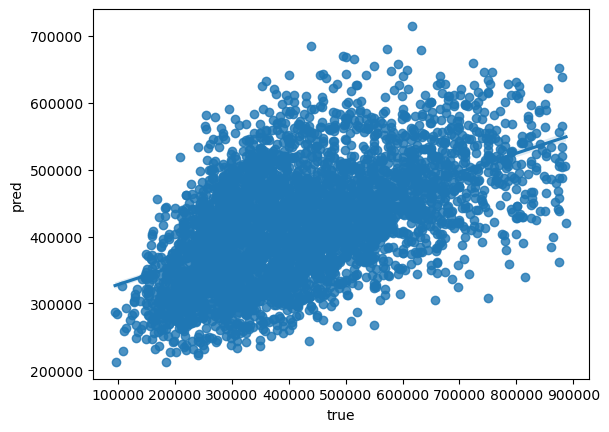

In [100]:
sns.regplot(results['true'], results['pred'])

In [ ]:
# removing outliers make our model worse